In [1]:
# 필요한 패키지 임포트
import pandas as pd
import glob, os
import tkinter as tk
from tkinter import *
from tkinter import filedialog
import warnings
warnings.filterwarnings('ignore')

In [2]:
## 파일 불러오기
file_path = "/content/drive/MyDrive/Colab Notebooks/LiverCancer_20210910083311.xlsx"
print("load file: ", file_path)
df = pd.read_excel(file_path, engine= 'openpyxl')

load file:  /content/drive/MyDrive/Colab Notebooks/LiverCancer_20210910083311.xlsx


In [ ]:
## 데이터에 무슨 항목이 있는 지 확인
pd.set_option('display.max_seq_items', None)
pd.set_option('display.width', 10)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.columns

In [ ]:
## 필요한 데이터만 골라서 가져오기
df2 = pd.DataFrame()
df2 = df[['연구번호','Conclusion(Liver CT)', 'Conclusion(Liver MRI)','결과G(Op Path)','결과M(Op Path)','결과D(Op Path)']].copy()
df2

In [ ]:
df2.dropna(subset=['결과D(Op Path)'],inplace=True) # 병리 리포트 없는 (NaN) 행 삭제
df3 = df2[df2['결과D(Op Path)']!=' '] # 병리 리포트가 공백인 행 삭제
df3 = df3[~(df3['Conclusion(Liver CT)'].isnull() & df3['Conclusion(Liver MRI)'].isnull())] # CT와 MRI 둘 다 시행 안한 환자들 삭제
df3

In [6]:
## CT/MR 판독문에서 HCC 추출 / 병리리포트에서 최종 결과 추출 (정규표현식 사용)

df3["CT"] = df3["Conclusion(Liver CT)"].str.extract(r'(HCC)')
df3["MRI"] = df3["Conclusion(Liver MRI)"].str.extract(r'(HCC)')
df3["Pathology1"] = df3["결과D(Op Path)"].str.extract(r'([Hh]epatocellular\s\w+)')
df3["Pathology2"] = df3["결과D(Op Path)"].str.extract(r'([Cc]holangiocarcinoma)')
df3["Pathology3"] = df3["결과D(Op Path)"].str.extract(r'([Mm]etastatic)')
df3["Pathology4"] = df3["결과D(Op Path)"].str.extract(r'([Nn]o remaining malignancy)')
df3["Pathology5"] = df3["결과D(Op Path)"].str.extract(r'(totally necrotic nodule)')
df3["Pathology6"] = df3["결과D(Op Path)"].str.extract(r'(Adrenal cortical carcinoma)')
df3["Pathology7"] = df3["결과D(Op Path)"].str.extract(r'(Malignant neoplasm)')

In [7]:
## 여러 병리 결과들을 한 개의 열로 통합하여 새로운 열 생성하고 필요없는 열들 삭제
temp = df3.iloc[:,8:15].fillna(' ')
df4 = pd.concat([df3.iloc[:,0:8],temp], axis=1)
df4['Pathology']=(df4['Pathology1']+df4['Pathology2']+df4['Pathology3']+df4['Pathology4']+df4['Pathology5']+df4['Pathology6']+df4['Pathology7']).str.strip()
df4.drop(columns=['Pathology1', 'Pathology2', 'Pathology3','Pathology4','Pathology5','Pathology6','Pathology7'],inplace=True)

## 병리 결과 정리 (대소문자, cHCC-CC)
df4['Pathology'].replace("cholangiocarcinoma","Cholangiocarcinoma",inplace=True)
df4['Pathology'].replace("hepatocellular carcinoma","Hepatocellular carcinoma",inplace=True)
df4['Pathology'].replace("Hepatocellular carcinoma metastatic","Hepatocellular carcinoma",inplace=True)
df4['Pathology'].replace("hepatocellular andcholangiocarcinomametastatic","cHCC-CC",inplace=True)
df4['Pathology'].replace("Hepatocellular carcinomacholangiocarcinoma","cHCC-CC",inplace=True)
df4['Pathology'].replace("metastatic","Metastatic",inplace=True)
df4['Pathology'].unique()

array(['Hepatocellular carcinoma', 'Cholangiocarcinoma', 'Metastatic',
       'cHCC-CC', 'No remaining malignancy', 'Malignant neoplasm',
       'Adrenal cortical carcinoma'], dtype=object)

In [8]:
df4

,연구번호,Conclusion(Liver CT),Conclusion(Liver MRI),결과G(Op Path),결과M(Op Path),결과D(Op Path),CT,MRI,Pathology
0,R000000067,A 6 cm sized HCC in the liver S6 subcapsular p...,A 6.9cm sized HCC in the liver S6 subcapsular ...,1. Submitted specimen; liver\n Specimen type; ...,a) cell type; hepatic \nb) histologic type; ma...,"1. Liver, right, hepatectomy(#1); \n Hepatocel...",HCC,HCC,Hepatocellular carcinoma
1,R000000120,8 cm sized peripheral enhancing mass with dela...,NaN,1. Submetted specimen; liver\n Specimen type; ...,-According to the 7th AJCC staging system\na) ...,"1. Liver, right hepatectomy(#1);\n Cholangioca...",HCC,NaN,Cholangiocarcinoma
3,R000000139,1. Two less than 3.8 cm sized peripheral enhan...,NaN,"The submitted specimen is a portion of liver, ...",,"Liver, right, lobectomy;\n Adenocarcinoma, met...",NaN,NaN,Metastatic
5,R000000449,HCC within DN in S8 dome area.\nUnderlying liv...,"1. HCC with OATP8 expression, S8, 2.4cm\n2. Li...",Submitted specimen; liver\nSpecimen type; righ...,a) lymph node metastasis; cannot be assessed\n...,"1. Liver, right lobe, right hepatectomy(#1);\n...",HCC,HCC,Hepatocellular carcinoma
7,R000000546,\n\n1. Underlying liver cirrhosis and infiltra...,\n1. Underlying liver cirrhosis.\n2. Infiltrat...,"1. Submitted specimen; liver, left lobe(#1), r...",a) cell type; hepatic\nb) histologic type; mac...,"1. Liver, left, lateral segmentectomy(#1); \n ...",HCC,HCC,Hepatocellular carcinoma
9,R000000613,About 1.8 cm sized HCC at the S6 of the liver.\n,About 2 cm sized HCC at the S6.,"Submitted specimen; liver, right lobe\nSpecime...",a) cell type; hepatic \nb) histologic type; mi...,"Liver, right, hepatectomy; \n Hepatocellular c...",HCC,HCC,Hepatocellular carcinoma
10,R000000625,\nA 4.8 cm sized hypervascular mass in the S6...,A 5.1cm sized HCC in S6 of the liver. \n - Fat...,Submitted specimen; liver\nSpecimen type; righ...,"a) cell type; hepatic, clear\nb) histologic ty...","1. Liver, right lobe, right hemihepatectomy(#1...",HCC,HCC,Hepatocellular carcinoma
11,R000000647,Chronic hepatitis \nA single nodular HCC at th...,\n1. About 2.7 cm sized HCC at the S7/8.\n2. T...,Submitted specimen; liver\nSpecimen type; righ...,a) cell type; hepatic \nb) histologic type; mi...,"Liver, right hemihepatectomy; \n Hepatocellula...",HCC,HCC,Hepatocellular carcinoma
13,R000000832,\n1. About 4.8cm sized HCC in the Rt hepatic d...,1. A 4.2x3.6x4.3 cm sized HCC with internal ne...,Submitted specimen; liver\nSpecimen type; righ...,a) cell type; hepatic\nb) histologic type; mac...,"Liver, right, hepatectomy; \n Hepatocellular c...",HCC,HCC,Hepatocellular carcinoma
15,R000000917,Three less than 4 cm sized HCC in posterior as...,"Three, less than 4 cm sized HCC in the left la...",Submitted specimen; liver\nSpecimen type; left...,a) cell type; hepatic\nb) histologic type; mac...,"Liver, left lobe, left hepatectomy;\n Hepatoce...",HCC,HCC,Hepatocellular carcinoma


In [9]:
## 결과물을 엑셀 파일로 저장
df4.to_excel('result.xlsx',encoding='utf-8-sig', index=False)

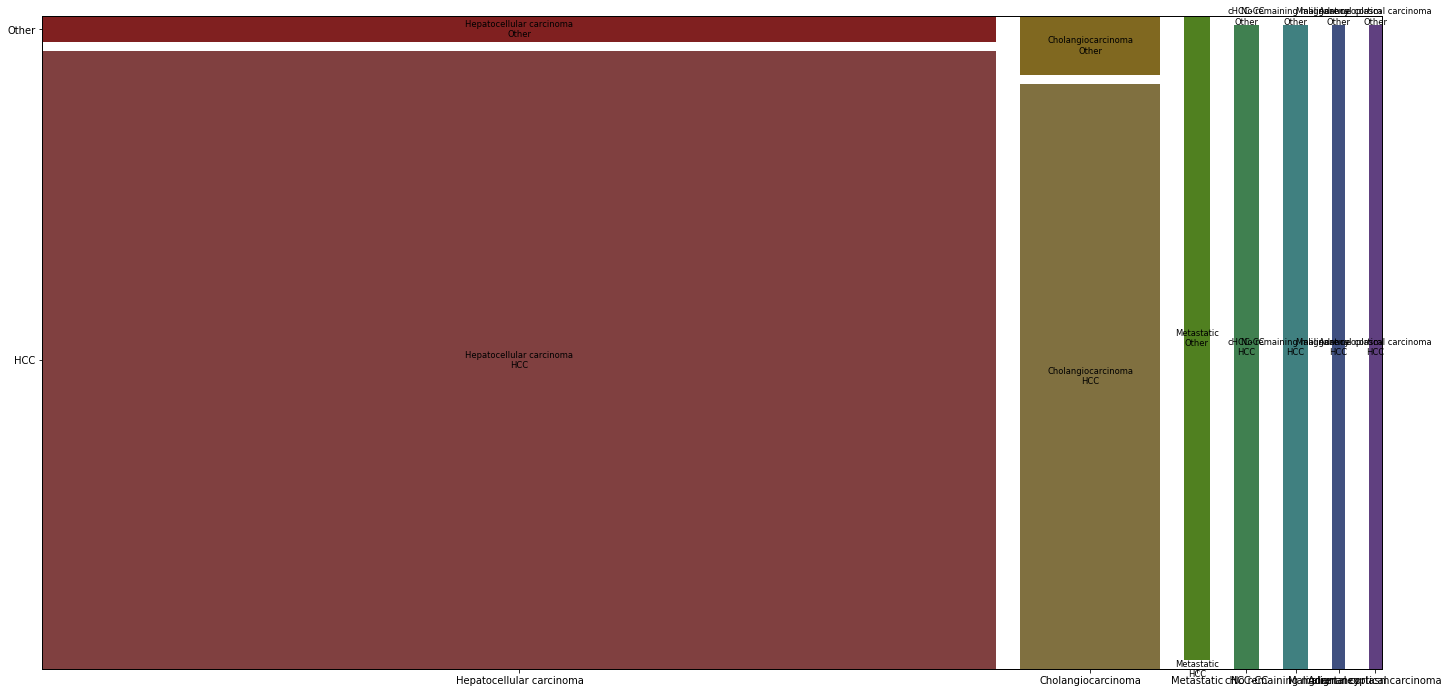

In [10]:
## 시각화
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [24, 12]

df4['CT'].fillna('N',inplace=True)
df4['MRI'].fillna('N',inplace=True)
df4['Imaging']=(df4['CT']+df4['MRI']).str.strip()
df4['Imaging'].replace("HCCHCC","HCC",inplace=True)
df4['Imaging'].replace("NHCC","HCC",inplace=True)
df4['Imaging'].replace("HCCN","HCC",inplace=True)
df4['Imaging'].replace("NN","Other",inplace=True)

mosaic(df4, ['Pathology','Imaging'], gap=0.02)
plt.show()